<a href="https://colab.research.google.com/github/mostafa-ja/mal_adv3/blob/main/Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://drive.google.com/file/d/103hYqdHD6mjAUVqMAECgZEZ7U7YmSCP9/view?usp=sharing
import gdown
download_link = 'https://drive.google.com/uc?id=103hYqdHD6mjAUVqMAECgZEZ7U7YmSCP9'
output_filepath = '/content/'
gdown.download(download_link, output_filepath)

Downloading...
From: https://drive.google.com/uc?id=103hYqdHD6mjAUVqMAECgZEZ7U7YmSCP9
To: /content/drebin_drift.parquet.zip
100%|██████████| 16.6M/16.6M [00:00<00:00, 24.6MB/s]


'/content/drebin_drift.parquet.zip'

In [3]:
import pandas as pd
df = pd.read_parquet("/content/drebin_drift.parquet.zip")
df.head(3)

,sha256,submission_date,api_call,permission,url,provider,feature,intent,activity,call,service_receiver,real_permission,label
0,a44a4856e27a0f8448a12f445b46d9430b93fd15414b04...,2009-06-08 02:21:25,android/media/MediaPlayer->start android/app/A...,android.permission.VIBRATE,,,android.hardware.touchscreen,android.intent.action.MAIN android.intent.cate...,.FlAndroidApp FlAndroidApp,getSystemService,,android.permission.INTERNET android.permission...,0
1,05ffa80882edba811018e95e0284b1b77f36a5e0a85236...,2009-06-08 02:25:49,android/media/MediaPlayer->stop android/os/Vib...,android.permission.VIBRATE android.permission....,,,android.hardware.touchscreen android.hardware....,android.intent.action.MAIN android.intent.cate...,.GloftMPL2,getSystemService,,android.permission.MODIFY_AUDIO_SETTINGS andro...,0
2,788411a922a37bdd731902272a2e22530bea75d6d44bc9...,2009-06-08 02:29:07,android/media/MediaPlayer->start android/app/A...,,,,android.hardware.touchscreen,android.intent.action.MAIN android.intent.cate...,.FlAndroidApp FlAndroidApp,getSystemService,,android.permission.INTERNET android.permission...,0


In [4]:
df.rename(columns = {'feature':'Hardware Component', 'real_permission':'Used Permission', 'api_call':'Suspicious API Call', 'permission':'Requested Permission' }, inplace = True)

In [5]:
df.head(3)

,sha256,submission_date,Suspicious API Call,Requested Permission,url,provider,Hardware Component,intent,activity,call,service_receiver,Used Permission,label
0,a44a4856e27a0f8448a12f445b46d9430b93fd15414b04...,2009-06-08 02:21:25,android/media/MediaPlayer->start android/app/A...,android.permission.VIBRATE,,,android.hardware.touchscreen,android.intent.action.MAIN android.intent.cate...,.FlAndroidApp FlAndroidApp,getSystemService,,android.permission.INTERNET android.permission...,0
1,05ffa80882edba811018e95e0284b1b77f36a5e0a85236...,2009-06-08 02:25:49,android/media/MediaPlayer->stop android/os/Vib...,android.permission.VIBRATE android.permission....,,,android.hardware.touchscreen android.hardware....,android.intent.action.MAIN android.intent.cate...,.GloftMPL2,getSystemService,,android.permission.MODIFY_AUDIO_SETTINGS andro...,0
2,788411a922a37bdd731902272a2e22530bea75d6d44bc9...,2009-06-08 02:29:07,android/media/MediaPlayer->start android/app/A...,,,,android.hardware.touchscreen,android.intent.action.MAIN android.intent.cate...,.FlAndroidApp FlAndroidApp,getSystemService,,android.permission.INTERNET android.permission...,0


In [6]:
df.columns

Index(['sha256', 'submission_date', 'Suspicious API Call',
       'Requested Permission', 'url', 'provider', 'Hardware Component',
       'intent', 'activity', 'call', 'service_receiver', 'Used Permission',
       'label'],
      dtype='object')

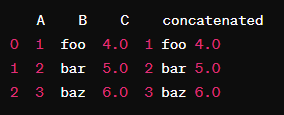

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Example documents
documents = [
    "This is the firstdocument.",
    "This document is the.econd_document.",
    "And this is the,thirdone.",
    "Is this the first document?",
]

# Create CountVectorizer object with modified token pattern
vectorizer = CountVectorizer(binary=True, token_pattern=r'\S+')

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# Convert sparse matrix to array for visualization
X_array = X.toarray()

# Print feature names (vocabulary)
print("Vocabulary:", vectorizer.get_feature_names_out())

# Print feature matrix
print("Feature Matrix:")
print(X_array)


Vocabulary: ['and' 'document' 'document?' 'first' 'firstdocument.' 'is' 'the'
 'the,thirdone.' 'the.econd_document.' 'this']
Feature Matrix:
[[0 0 0 0 1 1 1 0 0 1]
 [0 1 0 0 0 1 0 0 1 1]
 [1 0 0 0 0 1 0 1 0 1]
 [0 0 1 1 0 1 1 0 0 1]]


In [12]:
columns = ['Suspicious API Call','Requested Permission', 'url', 'provider', 'Hardware Component','intent', 'activity', 'call', 'service_receiver', 'Used Permission']
for column in columns:
  vectorizer = CountVectorizer(binary=True, token_pattern=r'\S+')
  X = vectorizer.fit_transform(df[str(column)])
  print(column , " : ",X.shape[1])


Suspicious API Call  :  315
Requested Permission  :  3803
url  :  58443
provider  :  4463
Hardware Component  :  72
intent  :  6313
activity  :  181845
call  :  800
service_receiver  :  32569
Used Permission  :  70


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_data(df):
    # Concatenate all columns into a single string
    df['concatenated'] = df.apply(lambda row: ' '.join(row.astype(str)), axis=1)
    return df['concatenated']

def extract_features(df):
    # Preprocess the data
    data = preprocess_data(df)

    # Use CountVectorizer to tokenize and one-hot encode the data
    vectorizer = CountVectorizer(binary=True, token_pattern=r'\S+')
    X = vectorizer.fit_transform(data)

    return X, vectorizer.vocabulary_


In [35]:
# Assuming 'df' is your DataFrame
X, vocab = extract_features(df[['Suspicious API Call','Requested Permission', 'url', 'provider', 'Hardware Component','intent', 'activity', 'call', 'service_receiver', 'Used Permission']])

# X is now your feature matrix, and vocab contains the vocabulary
print(X.shape)  # Print shape of feature matrix

<ipython-input-8-8cfd7c3946e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['concatenated'] = df.apply(lambda row: ' '.join(row.astype(str)), axis=1)


(129013, 286510)


In [36]:
def swap_keys_and_values(original_dict):
    new_dict = {value: key for key, value in original_dict.items()}
    return new_dict

# Create new dictionary with swapped keys and values
vocab_n = swap_keys_and_values(vocab)

In [9]:
# Retrieve the first row of X
first_row = X[0]

# Get the indices where the values are non-zero (indicating the presence of a term)
nonzero_indices = first_row.nonzero()[1]

# Get the corresponding terms from the vocabulary
terms = [term for term, index in vocab.items() if index in nonzero_indices]

print("First row of X with corresponding vocabulary terms:")
for term in terms:
    print(term)


First row of X with corresponding vocabulary terms:
android/media/mediaplayer->start
android/app/activity->setcontentview
android/os/vibrator->cancel
android.permission.vibrate
android.hardware.touchscreen
android.intent.action.main
android.intent.category.launcher
.flandroidapp
flandroidapp
getsystemservice
android.permission.internet
android.permission.wake_lock


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

labels= list(df['label'])

# Step 1: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, labels)

# Step 2: Access Feature Importances
feature_importances = rf_classifier.feature_importances_

# Step 3: Rank Features by Importance
# Get the indices that would sort the feature importances array in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the top N features and their importance scores
N = 20  # Number of top features to display
print("Top", N, "features:")
print("{:<60} {:<20}".format("Feature", "Importance Score"))
print('----------------------------------------------------------------')
for i in range(N):
    feature_index = sorted_indices[i]
    importance_score = feature_importances[feature_index]
    print("{:<60} {:<20}".format(vocab_n[feature_index], importance_score))

In [30]:
import numpy as np

# Step 2: Access Feature Importances
feature_importances = rf_classifier.feature_importances_

# Step 3: Rank Features by Importance
# Get the indices that would sort the feature importances array in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the top N features and their importance scores
N = 20  # Number of top features to display
print("Top", N, "features:")
print("{:<60} {:<20}".format("Feature", "Importance Score"))
print('----------------------------------------------------------------')
for i in range(N):
    feature_index = sorted_indices[i]
    importance_score = feature_importances[feature_index]
    print("{:<60} {:<20}".format(vocab_n[feature_index], importance_score))


Top 20 features:
Feature                                                      Importance Score    
----------------------------------------------------------------
android.permission.send_sms                                  0.01956390058360878 
sendsms                                                      0.017777969644870936
android.permission.receive_sms                               0.01416583108303433 
android.intent.action.boot_completed                         0.01366625548909788 
android/telephony/smsmanager->sendtextmessage                0.012924047957110189
android.permission.read_sms                                  0.01223362823424201 
android.intent.action.sig_str                                0.010372220326192385
android.hardware.telephony                                   0.009894991539734898
system/bin/su                                                0.006968648446384479
android.permission.read_phone_state                          0.006867599907907169
android.intent.a

In [39]:
# Assuming 'sorted_indices' contains the indices of the top 1000 important features

# Select the indices of the top 1000 important features
top_indices = sorted_indices[:10000]

# Redefine X based on the top 1000 important features
X_redefined = X[:, top_indices]

# Now X_redefined contains only the top 1000 important features
X_redefined.shape

(129013, 10000)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

labels= list(df['label'])

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Instantiate a Random Forest classifier
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier2.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_classifier2.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9941479672906252
